In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [39]:
#load csv files
config=np.genfromtxt('datos/config.csv', delimiter=',', skip_header=0)
N=int(config[0])
t_max=int(config[1])

data=[]
for time in range(t_max):
	time_data=np.genfromtxt('datos/datos'+str(time)+'.csv', delimiter=',', skip_header=0)
	data.append(time_data[:,:-1])





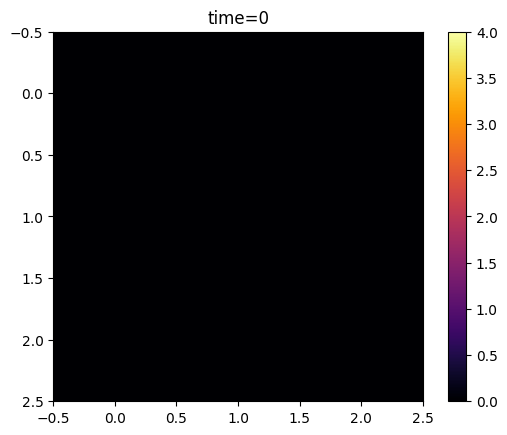

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)

def updatefig(q):
	plt.clf()
	single=data[q]
	ax.clear()
	ax.set_xticks([])
	ax.set_yticks([])
	plt.imshow(single, interpolation='nearest', cmap=plt.cm.inferno)
	plt.clim(0,4)
	plt.colorbar()
	plt.title('time='+str(q))

x=1
# y is equal to x string,
y = str(x)

ani = animation.FuncAnimation(fig, updatefig, frames=t_max)
ani.save('animation_'+str(t_max)+'.gif', fps=30)

In [ ]:
#gif to mp4
#ffmpeg -i animation.gif animation.mp4
import moviepy.editor as mp

In [53]:
import moviepy.editor as mp
import os
import sys

f="animation2.gif"
clip = mp.VideoFileClip((f))
clip.write_videofile(os.path.splitext(f)[0]+'.mp4')
    

Moviepy - Building video animation2.mp4.
Moviepy - Writing video animation2.mp4



Moviepy - Done !
Moviepy - video ready animation2.mp4
